<a href="https://colab.research.google.com/github/Chae-yoonsik/DL_python/blob/main/Zhang_%EC%9A%94%EC%95%BD%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#다운받기

In [ ]:
!pip install umap-learn
!pip install factor-analyzer
!apt-get install -y python3-igraph  # Ubuntu에서 igraph 설치
!pip install leidenalg
!pip install cairocffi  # pycairo 대신 사용 가능
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=d2fee141eef3697293ab99f9976a19f3872b2d92e85868571d5c08f5e49a2448
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-texttable
The following NEW packages will be installed:
  python3-igraph python3-texttable
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
N

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import seaborn as sn
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import os
import umap
import pandas as pd
import scipy
from scipy import stats
from scipy.spatial import distance
from scipy.cluster import hierarchy
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# TensorFlow 2.x 버전
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda, Input, Dense, Flatten, Multiply, Reshape, concatenate
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform  # Or your initializer of choice
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dropout, Conv1D, MaxPooling1D, Conv2DTranspose, BatchNormalization

In [ ]:
#conda install -c conda-forge pycairo
import igraph as ig
import leidenalg as la

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
import os
import numpy as np
import random
import itertools

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets,transforms
from torchvision.utils import save_image

#데이터 생성

In [ ]:
import numpy as np
import pandas as pd

# 설정
num_samples = 500          # 샘플 수
num_items = 30             # 총 문항 수
num_factors = 2            # 요인 수 (F1, F2)

# 요인별 문항 수
items_per_factor = 12
unrelated_items = num_items - (num_factors * items_per_factor)

# 요인 적재 및 상관 설정
loading_factors = [0.7, 0.7]      # 각 요인에 대한 문항 적재값 (F1:0.7, F2:0.5)
factor_correlation = 0.5          # 요인 간 상관

# 무관한 문항 간의 잔차 상관계수
unrelated_correlation = 0.1

# 랜덤 시드 설정 (재현 가능성 확보)
#np.random.seed(42)

# 요인 간 공분산 행렬 (Φ)
factor_cov = np.full((num_factors, num_factors), factor_correlation)
np.fill_diagonal(factor_cov, 1)

# 요인 적재 행렬 생성 (L)
loadings = np.zeros((num_items, num_factors))
for factor in range(num_factors):
    start = factor * items_per_factor
    end = (factor + 1) * items_per_factor
    loadings[start:end, factor] = loading_factors[factor]

# 잔차 공분산 행렬 (Ψ) 초기화 (단위 행렬)
residual_cov = np.eye(num_items)

# 관련 문항의 잔차 분산 설정 (1 - loading^2)
for i in range(num_factors * items_per_factor):
    factor = i // items_per_factor
    residual_cov[i, i] = 1 - loading_factors[factor] ** 2

# 무관한 문항의 잔차 상관 설정 (0.07)
if unrelated_items > 1:
    # 무관한 문항의 잔차 공분산을 0.07로 설정
    residual_cov[num_factors * items_per_factor:, num_factors * items_per_factor:] = unrelated_correlation
    # 무관한 문항의 잔차 분산을 1로 설정
    np.fill_diagonal(residual_cov[num_factors * items_per_factor:, num_factors * items_per_factor:], 1)

# 전체 공분산 행렬 계산: Σ = L Φ L^T + Ψ
full_cov_matrix = loadings @ factor_cov @ loadings.T + residual_cov

# 양의 정부호 여부 확인
eigenvalues = np.linalg.eigvals(full_cov_matrix)
if np.all(eigenvalues > 0):
    print("공분산 행렬은 양의 정부호입니다.")
else:
    print("공분산 행렬은 양의 정부호가 아닙니다. 조정을 진행합니다.")
    # 최소 고유값이 0보다 작을 경우, 양의 정부호로 만들기 위해 조정
    min_eig = np.min(eigenvalues)
    if min_eig < 0:
        full_cov_matrix += np.eye(num_items) * (-min_eig + 1e-6)
    # 재확인
    eigenvalues = np.linalg.eigvals(full_cov_matrix)
    if np.all(eigenvalues > 0):
        print("공분산 행렬 조정 후, 양의 정부호입니다.")
    else:
        print("공분산 행렬 조정 후에도 양의 정부호가 아닙니다. 추가 조치가 필요합니다.")

# 데이터 생성
mean = np.zeros(num_items)
shuffled_data = np.random.multivariate_normal(mean, full_cov_matrix, num_samples)

# 데이터프레임으로 변환
shuffled_data_df = pd.DataFrame(shuffled_data, columns=[f'Item_{i+1}' for i in range(num_items)])


공분산 행렬은 양의 정부호입니다.


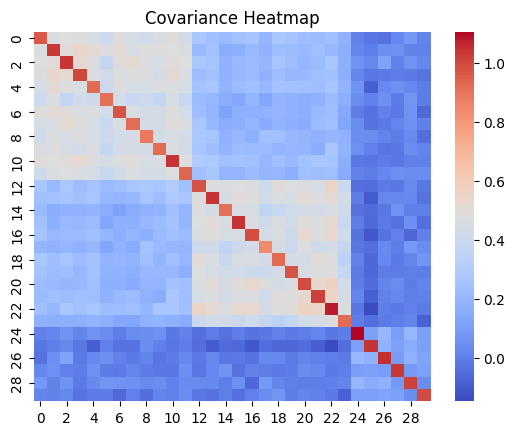

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(np.cov(shuffled_data, rowvar=False), cmap='coolwarm', cbar=True)
plt.title('Covariance Heatmap')
plt.show()

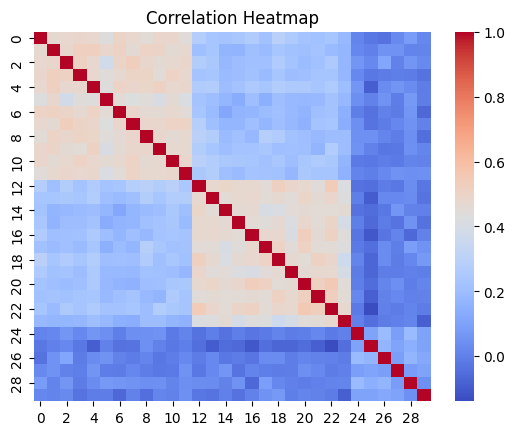

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
shuffled_data_df = pd.DataFrame(shuffled_data)

# 상관행렬 계산 및 히트맵 생성
sns.heatmap(shuffled_data_df.corr(), cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
class Mish(nn.Module):
    def forward(self, x):
        return x * torch.tanh(F.softplus(x))

In [ ]:
def reparameterization(mu, logvar):
    std = torch.exp(logvar/2)
    eps = torch.randn_like(std)
    return mu + eps * std

In [ ]:
class Encoder(nn.Module):
    def __init__(self, x_dim=img_size, h_dim=hidden_dim, z_dim=latent_dim):
        super(Encoder, self).__init__()

        self.mish = Mish()

        # 1st hidden layer
        self.fc1 = nn.Sequential(
            nn.Linear(x_dim, h_dim-50),
            self.mish,
            #nn.Dropout(p=0.2)
        )
        # output layer
        self.mu = nn.Linear(h_dim-50, z_dim)
        self.logvar = nn.Linear(h_dim-50, z_dim)

    def forward(self, x):
        x = self.fc1(x)


        mu = self.mish(self.mu(x))
        logvar = self.mish(self.logvar(x))

        z = reparameterization(mu, logvar)
        return z, mu, logvar

In [ ]:
class Decoder(nn.Module):
    def __init__(self, x_dim=img_size, h_dim=hidden_dim, z_dim=latent_dim):
        super(Decoder, self).__init__()

        self.mish = Mish()

        # 1st hidden layer
        self.fc1 = nn.Sequential(
            nn.Linear(z_dim, h_dim-50),
            self.mish,
            #nn.Dropout(p=0.2),
        )
        # output layer
        self.fc4 = nn.Linear(h_dim-50, x_dim)

    def forward(self, z):

        z = self.fc1(z)
        x_reconst = F.sigmoid(self.fc4(z))

        return x_reconst

#모델

In [ ]:
#device = torch,devide('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
encoder = Encoder().to(device)
decoder = Decoder().to(device)
optimizer = torch.optim.Adam(
    itertools.chain(encoder.parameters(), decoder.parameters()), lr=lr, betas=(b1, b2)#아담 기울기 계수. 이전 기울기가 있을 때 1차식, 2차식에서 이를 얼마나 사용할 것인지
)

#파라미터, 전처리

In [ ]:
scaled_X_tensor = torch.tensor(shuffled_data, dtype=torch.float32)

In [ ]:
channels = 1                    # MNIST has only 1

n_epochs = 100
batch_size = 64
lr = 1e-4
b1 = 0.9
b2 = 0.999
###관련 논문에서 ## hyper params
#batch_size = 64
#epochs =100
#lr = 0.0003
#decay = 1e-6
#beta = 1

#img_size = scaled_exp_data.shape[1]
img_size = shuffled_data.shape[1]
hidden_dim = 120
latent_dim = 25

#실행

In [ ]:
reconst = [[] for _ in range(n_epochs)]
latent_values = [[] for _ in range(n_epochs)]
average_loss = []
for epoch in range(n_epochs):
  train_loss = 0
  epoch_reconst = []
  latent_epoc = []
  for i, x in enumerate(scaled_X_tensor):
      # forward
      x = x.view(-1, img_size)
      x = x.to(device)
      z, mu, logvar = encoder(x)
      #z[:,2] = 0
      latent_epoc.append(z)
      x_reconst = decoder(z)


      # compute reconstruction loss and KL divergence
      reconst_loss = F.mse_loss(x_reconst, x, reduction='sum')
      kl_div = 0.5 * torch.sum(mu.pow(2) + logvar.exp() - logvar - 1)
      # backprop and optimize
      loss = reconst_loss + 10*kl_d
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss += loss.item()

      #reconst.append(x_reconst)
      reconst[epoch].append(x_reconst.cpu().detach().numpy())
      #if (i+1) % 10 == 0:
      #    print(f'Epoch [{epoch+1}/{n_epochs}], Step [{i+1}/{len(scaled_X_tensor)}], Reconst Loss : {reconst_loss.item():.4f}, KL Div: {kl_div.item():.4f}')

  latent_values[epoch] = latent_epoc
  #print(f'===> Epoch: {epoch+1} Average Train Loss: {train_loss/len(scaled_X_tensor):.4f} ')
  average_loss.append(train_loss/len(scaled_X_tensor))



In [ ]:
indata=pd.DataFrame(data=shuffled_data)

import numpy as np

# 각 텐서를 detach().numpy()로 변환 후 리스트로 처리
array_list = [tensor.detach().numpy() for tensor in latent_epoc]

# np.array 또는 np.vstack로 최종 배열 생성
final_array = np.vstack(array_list)

In [ ]:
#latent_epoc = latent_epoc.squeeze(1)
#print(latent_epoc.shape)
latent_epoc = np.array(final_array)

factors = ['F'+str(i) for i in range(latent_dim)]
factor_names = factors

# latent_epoc을 DataFrame에 열로 추가
for i in range(latent_dim):
    indata[factor_names[i]] = latent_epoc[:, i]


In [ ]:
latent_len = indata.shape[1]
max_items=latent_len - len(factors)
ffCorr=indata.corr()
facLoad=ffCorr.iloc[0:max_items,max_items:max_items+len(factors)]
idx=list(facLoad.index)
col=list(facLoad.columns)
factor_loadings=facLoad
#Get the rotated Factors
#rotator = Rotator()
#facLoadRotate=rotator.fit_transform(facLoad)
factor_loadings=pd.DataFrame(factor_loadings,index=idx,columns=col)
factor_loadings.head()

,F0,F1,F2
0,NaN,0.021180,0.073695
1,NaN,0.032762,0.014411
2,NaN,0.014098,0.072859
3,NaN,-0.028031,0.053911
4,NaN,0.005996,0.067790


In [ ]:
plt.figure(figsize=(10, 6))
dfs = [first.iloc[:, 0], secon.iloc[:, 1], third.iloc[:,2]]#, fourt.iloc[:,3], fifth.iloc[:,4]]
# dfs 리스트에 있는 각 Series를 그래프에 그리기
for i, series in enumerate(dfs):
    plt.plot(series.index, series, label=f'Column {i+1}')

# 라벨 추가
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot for Each Extracted Column')

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()

#reconstruct corr

In [ ]:
reconst = [[] for _ in range(n_epochs)]
latent_values = [[] for _ in range(n_epochs)]
average_loss = []

final_weights = {'fc1': [], 'fc2': [], 'fc3': [], 'fc4': []}

for epoch in range(n_epochs):
  train_loss = 0
  epoch_reconst = []
  latent_epoc = []
  #var_list = []
  for i, x in enumerate(scaled_X_tensor):
      # forward
      x = x.view(-1, img_size)
      x = x.to(device)
      z, mu, logvar = encoder(x)
      #z[:3] = 0
      latent_epoc.append(z)
      x_reconst = decoder(z)


      # compute reconstruction loss and KL divergence
      reconst_loss = F.mse_loss(x_reconst, x, reduction='sum')
      kl_div = 0.5 * torch.sum(mu.pow(2) + logvar.exp() - logvar - 1)
      # backprop and optimize
      loss = reconst_loss + kl_div
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss += loss.item()

      #reconst.append(x_reconst)
      reconst[epoch].append(x_reconst.cpu().detach().numpy())

      # 가중치 저장
      final_weights['fc1'].append(decoder.fc1[0].weight.detach().cpu().numpy())
      #final_weights['fc2'].append(decoder.fc2[0].weight.detach().cpu().numpy())
      #fc3을 사용하고 싶다면 주석 해제
      #final_weights['fc3'].append(decoder.fc3[0].weight.detach().cpu().numpy())
      final_weights['fc4'].append(decoder.fc4.weight.detach().cpu().numpy())
      #if (i+1) % 10 == 0:
      #    print(f'Epoch [{epoch+1}/{n_epochs}], Step [{i+1}/{len(scaled_X_tensor)}], Reconst Loss : {reconst_loss.item():.4f}, KL Div: {kl_div.item():.4f}')

  latent_values[epoch] = latent_epoc
  print(f'===> Epoch: {epoch+1} Average Train Loss: {train_loss/len(scaled_X_tensor):.4f} ')
  average_loss.append(train_loss/len(scaled_X_tensor))


###
###
#관련 논문
#def vae_loss(true, pred):
    #Calculate the loss function. It's composed of two parts. The first part calculate the MSE, the second part the
    #KL divergence between the prior and the estimated distribution on the latent factor.


    #reconstruction_loss = mse(K.flatten(true), K.flatten(pred)) *50

    #kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    #kl_loss = K.sum(kl_loss, axis=-1)
    #kl_loss *= -0.5
    #vae_loss = 0.5 * reconstruction_loss + beta * 0.5 * kl_loss
    #return vae_loss

===> Epoch: 1 Average Train Loss: 48.2956 
===> Epoch: 2 Average Train Loss: 42.8804 
===> Epoch: 3 Average Train Loss: 41.1562 
===> Epoch: 4 Average Train Loss: 40.4879 
===> Epoch: 5 Average Train Loss: 40.0361 
===> Epoch: 6 Average Train Loss: 40.1051 
===> Epoch: 7 Average Train Loss: 39.9128 
===> Epoch: 8 Average Train Loss: 39.7945 
===> Epoch: 9 Average Train Loss: 39.8395 
===> Epoch: 10 Average Train Loss: 39.5317 
===> Epoch: 11 Average Train Loss: 39.4372 
===> Epoch: 12 Average Train Loss: 39.5312 
===> Epoch: 13 Average Train Loss: 39.3544 
===> Epoch: 14 Average Train Loss: 39.1921 
===> Epoch: 15 Average Train Loss: 38.9105 
===> Epoch: 16 Average Train Loss: 38.7084 
===> Epoch: 17 Average Train Loss: 38.4627 
===> Epoch: 18 Average Train Loss: 38.1900 
===> Epoch: 19 Average Train Loss: 38.0990 
===> Epoch: 20 Average Train Loss: 38.0022 
===> Epoch: 21 Average Train Loss: 37.9353 
===> Epoch: 22 Average Train Loss: 37.7658 
===> Epoch: 23 Average Train Loss: 38.011

In [ ]:
print(reconst_loss,kl_div)

tensor(40.5600, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(1.6664, device='cuda:0', grad_fn=<MulBackward0>)


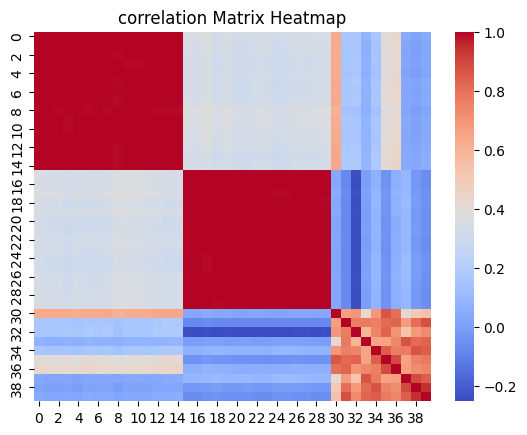

In [ ]:
#import pandas as pd
#import numpy as np

# reconst[epoch]가 3차원이므로 2차원으로 변환
reconst_2d = np.squeeze(reconst[epoch])  # shape을 (1500, 30)으로 변경

# DataFrame으로 변환
reconst_df = pd.DataFrame(reconst_2d)

# 상관관계 계산
correlation_matrix = reconst_df.corr()

# 결과 출력
#print(correlation_matrix)

sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('correlation Matrix Heatmap')
plt.show()

In [ ]:
import numpy as np
##########reconst는 배치만큼의 리스트를 가짐
##########에러가 낮거나 마지막 배치(학습이 된) 모델로 생성할 것.
indata=pd.DataFrame(data=shuffled_data)
array_list = [tensor for tensor in reconst[(n_epochs-1)]]  # tensor가 이미 numpy 배열이라면 detach() 필요 없음

#가장 마지막 epoch을 기준으로 설정하였음.
# np.vstack를 사용하여 최종 배열 생성
final_array = np.vstack(array_list)
#final_array=pd.DataFrame(data=final_array.squeeze(1))
final_array=pd.DataFrame(data=final_array)

print(final_array.shape)

(1500, 40)


In [ ]:
o = indata.corrwith(final_array)

In [ ]:
first = a - o
secon = b - o
third = c - o
fourt = d - o
#fifth = e - o
#six = f - o
#seve = g - o
#eigh = h - o
#nine = i - o
#ten = j - o

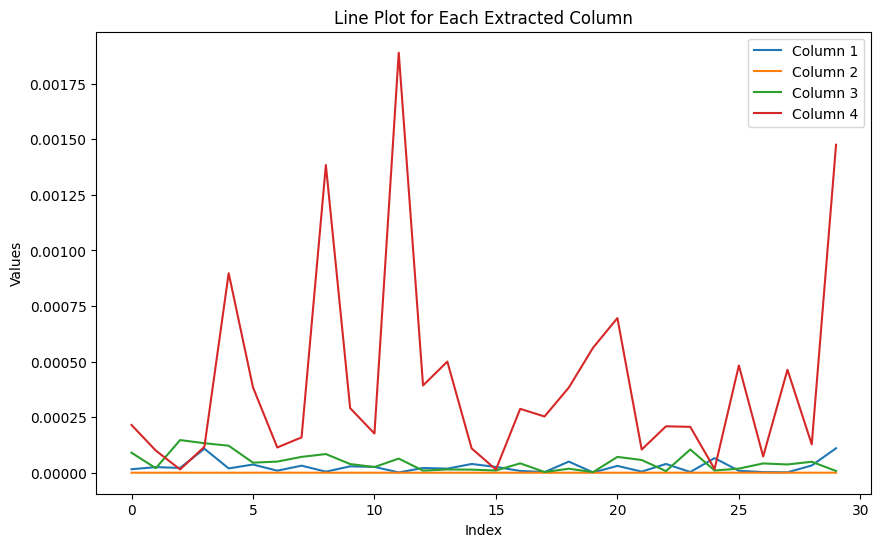

In [ ]:
plt.figure(figsize=(10, 6))
#dfs = [first.iloc[:, 0], secon.iloc[:, 1], third.iloc[:,2]]#, fourt.iloc[:,3], fifth.iloc[:,4]]
dfs = [first.abs(), secon.abs(), third.abs(), fourt.abs()]#, fifth.abs(), six.abs()]#, seve, eigh, nine, ten]#, fourt, fifth]
# dfs 리스트에 있는 각 Series를 그래프에 그리기
for i, series in enumerate(dfs):
    plt.plot(series.index, series, label=f'Column {i+1}')

# 라벨 추가
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot for Each Extracted Column')

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()

In [ ]:
len(decode_origin[4])

500

In [ ]:
data_2d.shape

(15000, 30)

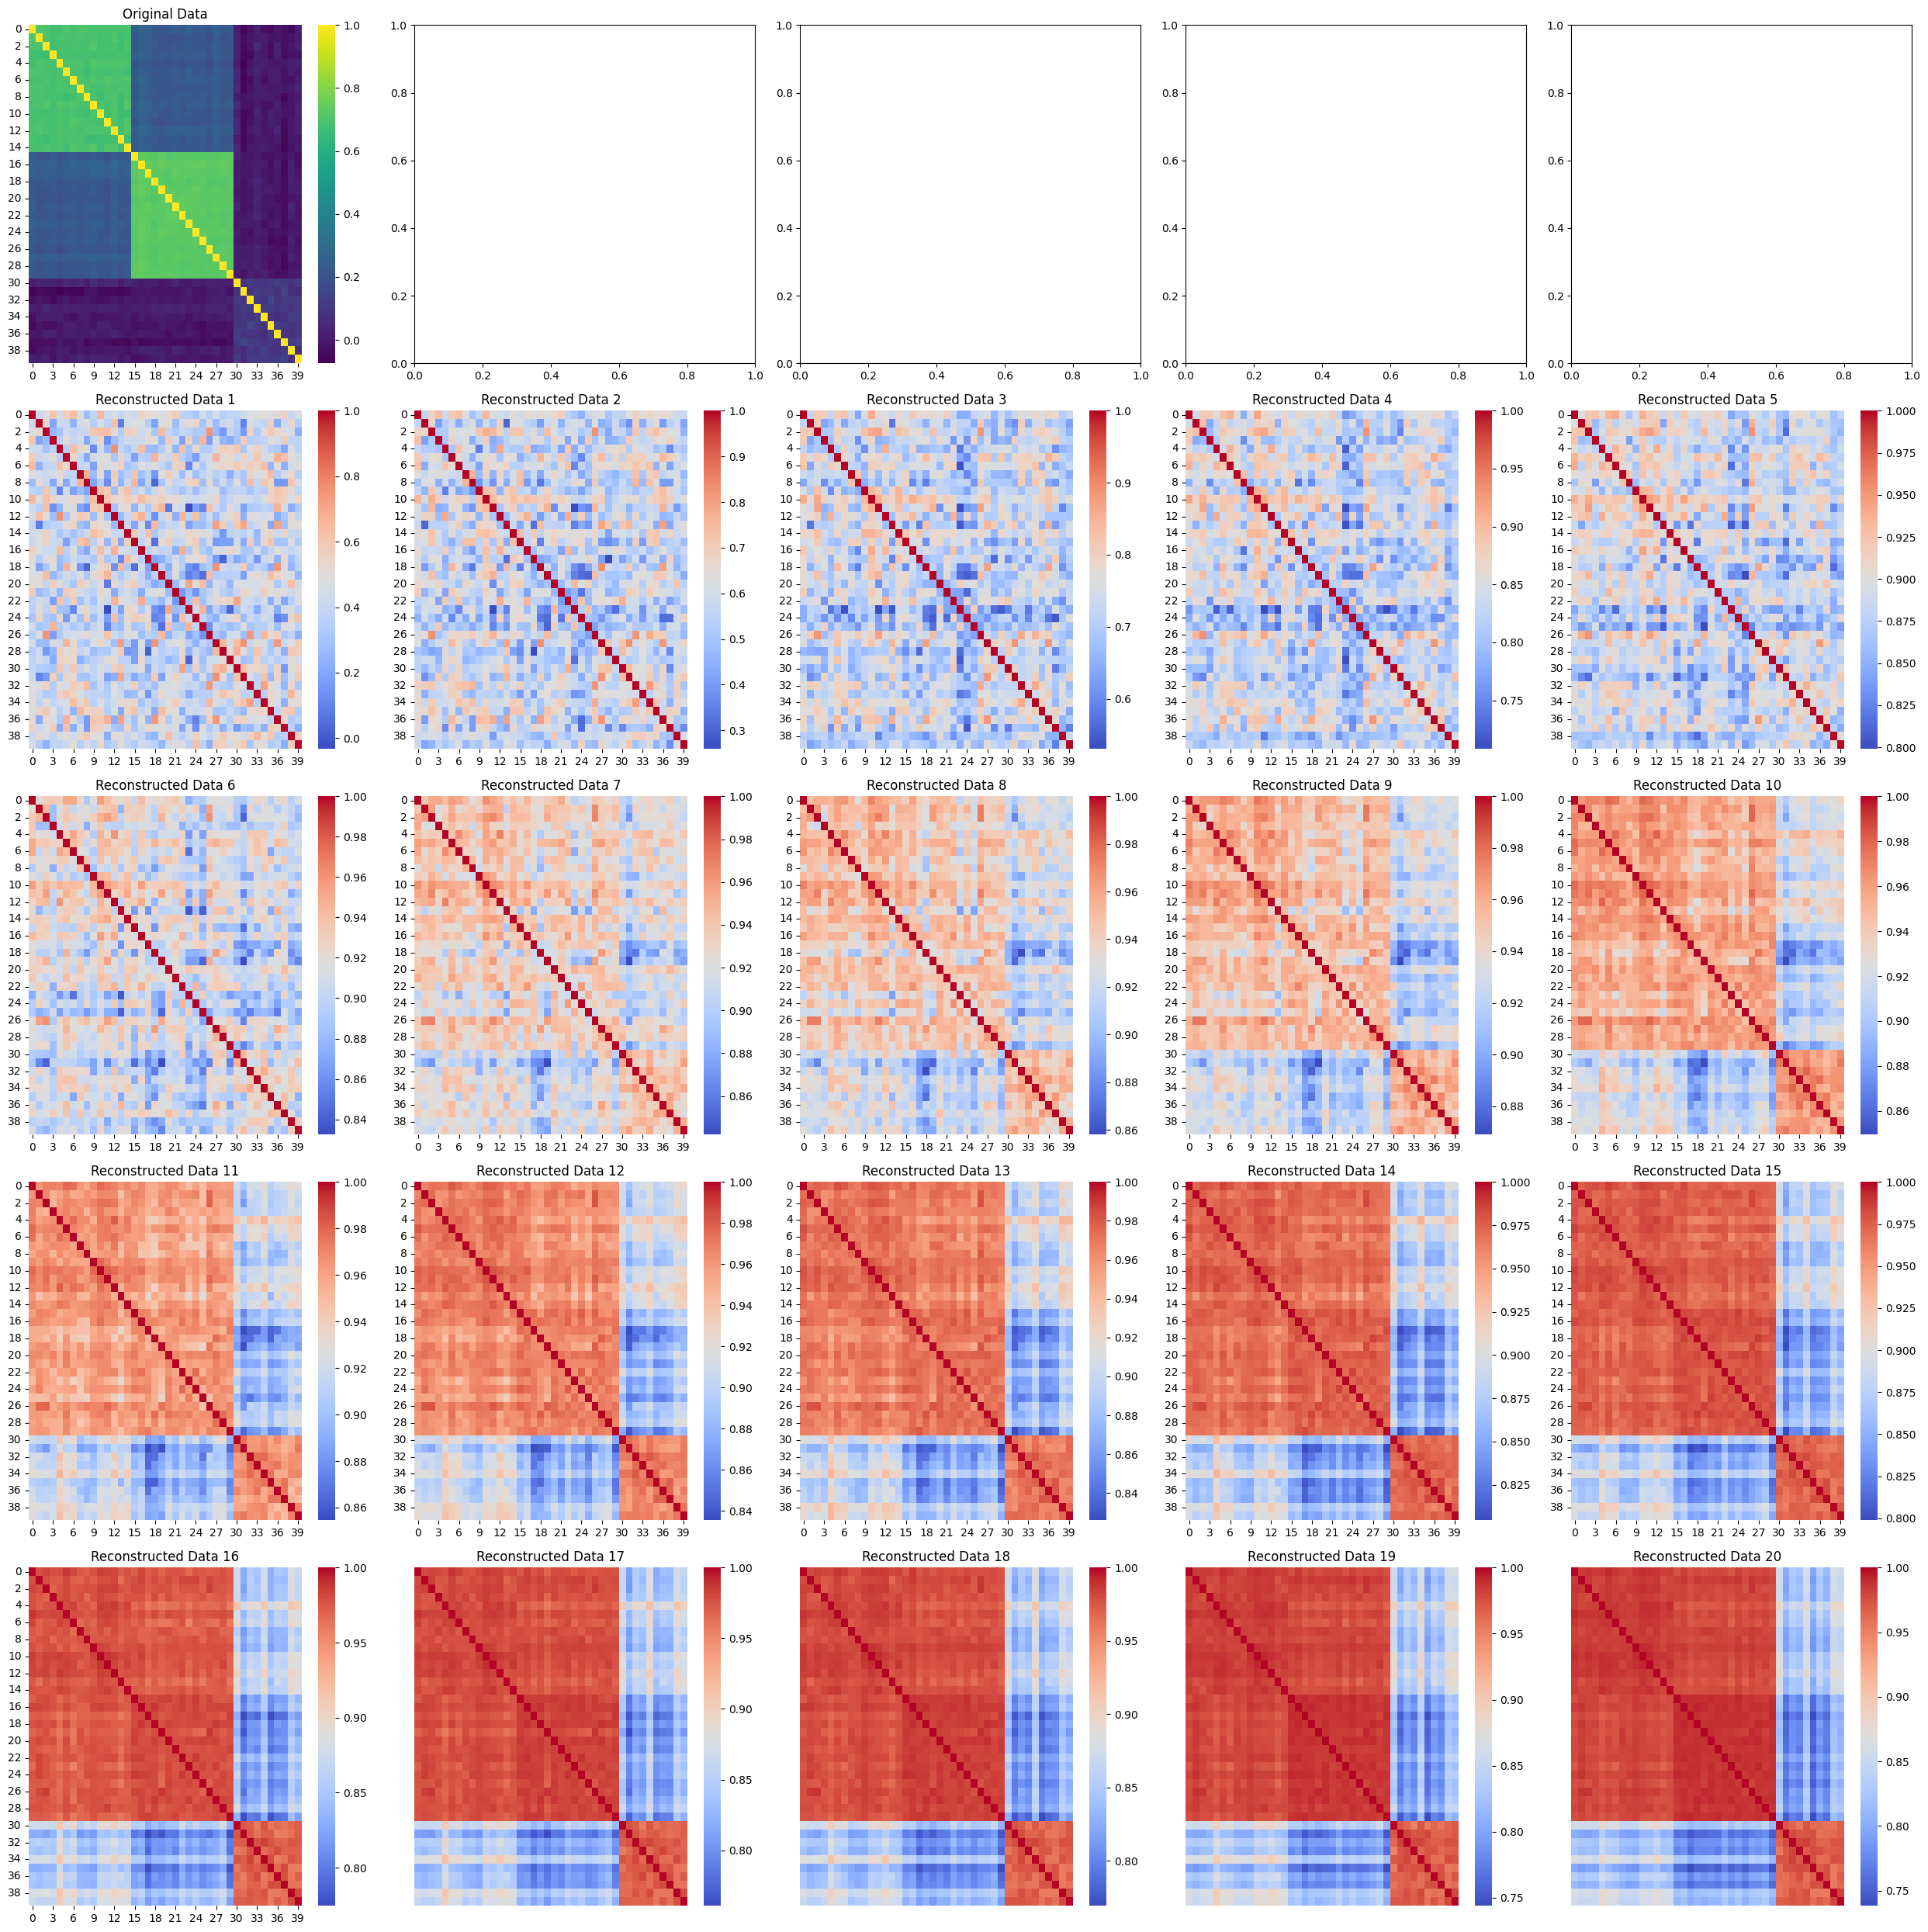

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터 생성 (reconst는 이미 주어진 데이터라고 가정합니다)
# 여기서는 reconst[0] ~ reconst[19]까지의 데이터를 사용하여 상관 행렬을 계산하고 히트맵을 그립니다.

# 데이터 배열을 numpy 배열로 변환
data_arrays = [np.array(reconst[i]) for i in range(20)]  # 20개의 reconstructed 데이터를 리스트로 저장

# 상관 행렬 계산 및 DataFrame으로 변환
correlation_dfs = []
for data_array in data_arrays:
    data_2d = data_array.squeeze(1)  # 결과는 10000x50 배열이 됨
    correlation_matrix = np.corrcoef(data_2d, rowvar=False)  # 변수 간의 상관계수를 계산할 때 rowvar=False를 사용
    correlation_df = pd.DataFrame(correlation_matrix)
    correlation_dfs.append(correlation_df)

# Original 데이터 상관 행렬 생성
original_corr_matrix = np.corrcoef(data, rowvar=False)
original_corr_df = pd.DataFrame(original_corr_matrix)

# 플롯 생성
fig, axes = plt.subplots(5, 5, figsize=(25, 25))  # 5x5의 서브플롯 생성 (총 25개의 서브플롯 중 21개를 사용)

# Original 데이터 히트맵
sns.heatmap(original_corr_df, ax=axes[0, 0], cmap='viridis', cbar=True)
axes[0, 0].set_title('Original Data')

# Reconstructed 데이터 히트맵들
for i, corr_df in enumerate(correlation_dfs):
    row = (i // 5) + 1  # 1행부터 시작
    col = i % 5  # 0부터 시작
    sns.heatmap(corr_df, ax=axes[row, col], cmap='coolwarm', cbar=True)
    axes[row, col].set_title(f'Reconstructed Data {i+1}')

# 여유 공간 설정
for i in range(len(correlation_dfs) + 1, 25):
    row = i // 5
    col = i % 5
    axes[row, col].axis('off')

# 플롯 조정
plt.tight_layout()
plt.show()


##weights곱으로 factor loading 만들어보기.

In [ ]:
print("Final weights after training:")
print("fc1 weight: ", final_weights['fc1'][-1].shape)
#print("fc2 weight: ", final_weights['fc2'][-1].shape)
#print("fc3 weight: ", final_weights['fc3'][-1])  # fc3을 사용한 경우
print("fc4 weight: ", final_weights['fc4'][-1].shape)

Final weights after training:
fc1 weight:  (70, 8)
fc4 weight:  (40, 70)


In [ ]:
fc1 = final_weights['fc1'][-1]
#fc2 = final_weights['fc2'][-1]
#fc3 = final_weights['fc3'][-1]
fc4 = final_weights['fc4'][-1]


fc10 = final_weights['fc1'][0]
#fc20 = final_weights['fc2'][0]
#fc30 = final_weights['fc3'][0]
fc40 = final_weights['fc4'][0]

In [ ]:
loading123 = fc4 @ fc1
loading123.shape

loading000 = fc40 @ fc10
loading000.shape

(40, 8)

In [ ]:
pdloading = pd.DataFrame(loading123)
pdloading

#pd0 = pd.DataFrame(loading000)
#pd0

,0,1,2,3,4,5,6,7
0,-0.010232,-0.110889,-4.414088,0.087185,-1.111221,-0.014598,2.528553,-0.020863
1,-0.019195,-0.081810,-4.436326,0.111132,-1.102065,0.045180,2.633100,0.039999
2,-0.050136,-0.107901,-4.418842,0.100976,-1.061863,0.043092,2.668016,0.024120
3,-0.026190,-0.142669,-4.120289,0.164129,-1.092807,0.009123,2.460160,-0.056746
4,-0.048302,-0.149799,-4.139782,0.156818,-1.189052,0.039054,2.443916,0.005968
5,-0.051278,-0.098757,-4.228179,0.073752,-1.038951,0.005032,2.554389,0.020170
6,-0.075099,-0.092252,-4.604362,0.090258,-1.025433,0.005638,2.750129,-0.032708
7,-0.062798,-0.102789,-4.420973,0.116922,-1.131357,0.125615,2.527222,-0.033571
8,-0.063616,-0.102530,-4.374404,0.101983,-0.941036,0.058069,2.693541,0.040080
9,-0.057464,-0.077641,-4.276092,0.141706,-0.951241,0.016993,2.592978,-0.007000


In [ ]:
rotator = Rotator()
facLoadRotate=rotator.fit_transform(df)

LinAlgError: SVD did not converge

In [ ]:
pd.DataFrame(facLoadRotate)

,0,1,2,3
0,0.026186,-0.580340,0.050304,0.935413
1,0.272495,-0.383754,0.045839,0.995476
2,0.269762,-0.888643,0.015574,0.303606
3,-0.120166,-0.972160,0.768435,0.690589
4,0.732241,-0.733290,0.028656,0.815523
5,0.022102,-1.105799,0.040931,0.661051
6,0.121162,-0.574985,0.043753,0.849980
7,0.207911,-0.472881,0.064276,1.322069
8,-0.106898,-0.934792,0.043231,0.672259
9,-0.063543,-0.450896,0.489510,1.106840


In [ ]:
df = pdloading.copy()
threshold = 0.4
df[abs(df) <= threshold] = 0
df

,0,1,2,3,4,5,6,7
0,0.0,0.000000,-4.414088,0.0,-1.111221,0.0,2.528553,0.000000
1,0.0,0.000000,-4.436326,0.0,-1.102065,0.0,2.633100,0.000000
2,0.0,0.000000,-4.418842,0.0,-1.061863,0.0,2.668016,0.000000
3,0.0,0.000000,-4.120289,0.0,-1.092807,0.0,2.460160,0.000000
4,0.0,0.000000,-4.139782,0.0,-1.189052,0.0,2.443916,0.000000
5,0.0,0.000000,-4.228179,0.0,-1.038951,0.0,2.554389,0.000000
6,0.0,0.000000,-4.604362,0.0,-1.025433,0.0,2.750129,0.000000
7,0.0,0.000000,-4.420973,0.0,-1.131357,0.0,2.527222,0.000000
8,0.0,0.000000,-4.374404,0.0,-0.941036,0.0,2.693541,0.000000
9,0.0,0.000000,-4.276092,0.0,-0.951241,0.0,2.592978,0.000000


#reparametrization한 z와 입력 matrix의 상관 구하기

In [ ]:
import torch
import torch.nn.functional as F

reconst = [[] for _ in range(n_epochs)]
latent_values = [[] for _ in range(n_epochs)]
average_loss = []

final_weights = {'fc1': [], 'fc2': [], 'fc3': [], 'fc4': []}

best_loss = float('inf')  # 초기 최상의 손실값
#patience = 5  # 개선이 없을 경우 기다리는 에폭 수
early_stop_counter = 0  # 개선이 없는 에폭 카운터

for epoch in range(n_epochs):
    train_loss = 0
    epoch_reconst = []
    latent_epoc = []
    z_epoc = []

    # 훈련 단계
    for i, x in enumerate(scaled_X_tensor):
        x = x.view(-1, img_size)
        x = x.to(device)
        z, mu, logvar = encoder(x)
        latent_epoc.append(z)
        z_epoc.append(mu)
        x_reconst = decoder(z)

        reconst_loss = F.mse_loss(x_reconst, x, reduction='sum')
        kl_div = 0.5 * torch.sum(mu.pow(2) + logvar.exp() - logvar - 1)
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        reconst[epoch].append(x_reconst.cpu().detach().numpy())

        final_weights['fc1'].append(decoder.fc1[0].weight.detach().cpu().numpy())
        final_weights['fc4'].append(decoder.fc4.weight.detach().cpu().numpy())

         #Early stopping 로직
    #if train_loss < best_loss:
    #   best_loss = train_loss
    #   early_stop_counter = 0  # 손실이 개선되었으므로 카운터 초기화
            # 여기서 최고의 가중치를 저장할 수 있음
            # best_weights = decoder.state_dict()
    #else:
    #   early_stop_counter += 1


    # 검증 손실 계산 (여기서는 검증 데이터가 필요함)
    # valid_loss = compute_validation_loss(validation_data)
    # valid_loss = ...

    latent_values[epoch] = latent_epoc
    avg_train_loss = train_loss / len(scaled_X_tensor)
    print(f'===> Epoch: {epoch+1} Average Train Loss: {avg_train_loss:.4f} ')
    #if early_stop_counter >= patience:
       #print(f'Early stopping triggered at epoch {epoch+1}, batch {i+1}!')
      #break

===> Epoch: 1 Average Train Loss: 26.5652 
===> Epoch: 2 Average Train Loss: 26.6367 
===> Epoch: 3 Average Train Loss: 26.8864 
===> Epoch: 4 Average Train Loss: 26.6253 
===> Epoch: 5 Average Train Loss: 26.6600 
===> Epoch: 6 Average Train Loss: 26.8642 
===> Epoch: 7 Average Train Loss: 26.4672 
===> Epoch: 8 Average Train Loss: 26.4357 
===> Epoch: 9 Average Train Loss: 26.6942 
===> Epoch: 10 Average Train Loss: 26.5918 
===> Epoch: 11 Average Train Loss: 26.6899 
===> Epoch: 12 Average Train Loss: 26.3748 
===> Epoch: 13 Average Train Loss: 26.6121 
===> Epoch: 14 Average Train Loss: 26.5382 
===> Epoch: 15 Average Train Loss: 26.5416 
===> Epoch: 16 Average Train Loss: 26.6351 
===> Epoch: 17 Average Train Loss: 26.6262 
===> Epoch: 18 Average Train Loss: 26.8970 
===> Epoch: 19 Average Train Loss: 26.4643 
===> Epoch: 20 Average Train Loss: 26.7506 
===> Epoch: 21 Average Train Loss: 26.5737 
===> Epoch: 22 Average Train Loss: 26.4859 
===> Epoch: 23 Average Train Loss: 26.507

torch.Size([1, 25])

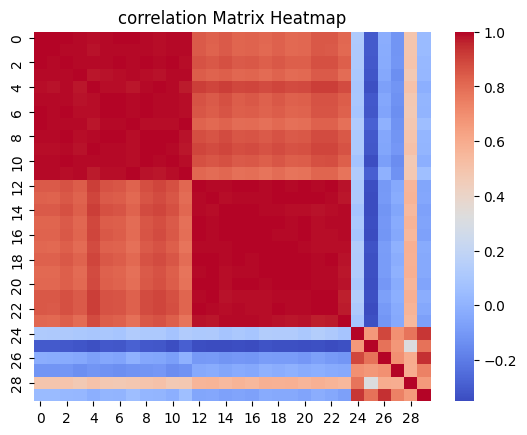

In [ ]:
##import pandas as pd
#import numpy as np

# reconst[epoch]가 3차원이므로 2차원으로 변환
reconst_2d = np.squeeze(reconst[epoch])  # shape을 (1500, 30)으로 변경

# DataFrame으로 변환
reconst_df = pd.DataFrame(reconst_2d)

# 상관관계 계산
correlation_matrix = reconst_df.corr()

# 결과 출력
#print(correlation_matrix)

sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('correlation Matrix Heatmap')
plt.show()

In [ ]:
reconst_2d.shape

(500, 30)

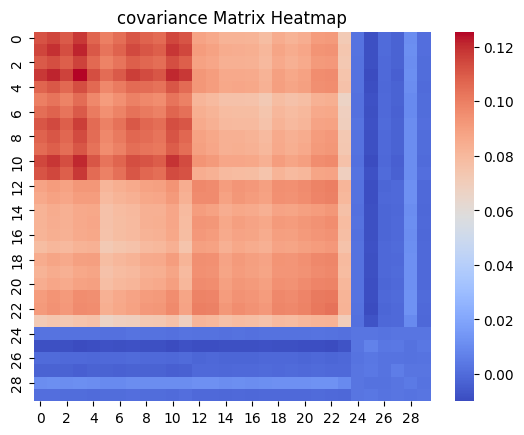

In [ ]:
cov_matrix = np.cov(reconst_2d, rowvar=False)
sns.heatmap(cov_matrix, cmap='coolwarm', cbar=True)
plt.title('covariance Matrix Heatmap')
plt.show()

In [ ]:
print(reconst_loss, kl_div)

tensor(18.0076, grad_fn=<MseLossBackward0>) tensor(0.3352, grad_fn=<MulBackward0>)


In [ ]:
# 각 텐서가 2차원 배열이므로 np.vstack 사용
final_array = [tensor.detach().cpu().numpy() for tensor in latent_epoc]
final_array1 = np.vstack(final_array)

final_array1.shape

(500, 25)

In [ ]:
indata=pd.DataFrame(data=shuffled_data)
outdata=pd.DataFrame(data=reconst_2d)

factors = ['F'+str(i) for i in range(latent_dim)]
factor_names = factors

# latent_epoc을 DataFrame에 열로 추가
for i in range(latent_dim):
    indata[factor_names[i]] = final_array1[:, i]
    outdata[factor_names[i]] = final_array1[:, i]


In [ ]:
print(indata.shape, outdata.shape)

(1000, 55) (1000, 55)


In [ ]:
latent_len = indata.shape[1]
max_items=latent_len - len(factors)
ffCorr=indata.corr()
facLoad=ffCorr.iloc[0:max_items,max_items:max_items+len(factors)]
idx=list(facLoad.index)
col=list(facLoad.columns)
factor_loadings=facLoad
#Get the rotated Factors
rotator = Rotator()#method='promax') # 기본값 varimax, 설정값 'oblimin', 'promax'
facLoadRotate=rotator.fit_transform(facLoad)
factor_loadings=pd.DataFrame(facLoadRotate,index=idx,columns=col)
factor_loadings

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
0,-0.015940,0.010922,-0.013659,0.021207,-0.019455,0.003154,-0.057020,0.110978,0.009381,0.004412,...,-0.023882,1.910432e-04,-0.001522,0.715389,0.003846,-0.001737,0.004035,0.017798,0.345157,-0.000310
1,-0.000526,-0.017420,-0.082012,-0.041588,0.002524,-0.045153,-0.119450,0.002224,-0.000872,0.015446,...,0.019433,-3.632950e-03,-0.001006,0.749966,-0.007859,0.011138,0.000606,0.034045,0.376762,0.072207
2,0.011989,-0.017565,-0.023449,-0.002181,0.009604,-0.029381,-0.037799,0.003566,0.004985,-0.000894,...,-0.002432,-2.480465e-05,-0.000555,0.672778,-0.005063,0.012862,-0.000205,0.006605,0.333906,-0.002178
3,0.031998,-0.020577,-0.067870,-0.004124,-0.020886,0.005569,-0.052270,-0.041912,0.011727,0.009884,...,-0.028516,5.340423e-03,-0.007783,0.716323,-0.022998,-0.011281,-0.034619,-0.012188,0.336396,-0.010197
4,-0.011893,-0.002675,-0.064127,-0.002712,-0.024209,0.035805,-0.052404,0.003972,0.028382,0.080420,...,-0.043522,-1.903966e-03,0.000701,0.639231,0.004945,-0.025815,-0.000148,-0.011983,0.498875,0.009663
5,-0.007709,-0.033410,-0.016520,-0.090967,0.000391,-0.009697,-0.107417,-0.009933,0.009027,-0.007265,...,-0.032153,1.465453e-03,0.005303,0.587935,0.011357,-0.029454,0.006518,-0.038571,0.262179,0.005433
6,0.021727,-0.009850,-0.035790,0.006499,-0.019734,-0.030169,-0.091538,-0.009650,-0.072644,-0.015538,...,0.025281,-1.663315e-03,-0.000933,0.612406,0.001358,-0.069376,0.001630,0.053469,0.262258,0.000248
7,-0.007694,0.007674,-0.036988,0.014871,0.010839,0.039979,-0.005065,0.022807,-0.007552,-0.018064,...,-0.025738,-6.447269e-03,-0.009400,0.683346,0.057361,0.025056,-0.012041,-0.025039,0.263747,-0.034547
8,-0.040518,0.017111,-0.046050,0.020513,0.025356,-0.036139,-0.000151,-0.061479,0.045199,0.025063,...,-0.011391,-6.846802e-03,-0.007750,0.685401,0.003392,0.019425,0.032702,0.019223,0.381947,0.003771
9,-0.054240,0.075951,-0.017384,0.070576,0.018983,0.026764,-0.024346,0.014842,0.025265,-0.024891,...,-0.020290,4.317271e-03,0.017812,0.590579,0.002266,0.025920,0.027065,-0.007605,0.387798,-0.002736


df = factor_loadings.copy()
threshold = 0.03
df[abs(df) <= threshold] = 0
df

In [ ]:
df = factor_loadings.copy()
threshold = 0.4
df[abs(df) <= threshold] = 0
df.iloc[:,20:25]

,F20,F21,F22,F23,F24
0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.498875,0.0
5,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.000000,0.0
8,0.0,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.000000,0.0


In [ ]:
facLoad

In [ ]:
#outout data
latent_len1 = outdata.shape[1]
max_items1=latent_len1 - len(factors)
ffCorr1=outdata.corr()
facLoad1=ffCorr1.iloc[0:max_items1,max_items1:max_items1+len(factors)]
idx=list(facLoad1.index)
col=list(facLoad1.columns)
factor_loadings1=facLoad1
#Get the rotated Factors
rotator1 = Rotator(method='oblimin') # 기본값 varimax, 설정값 'oblimin', 'promax'
facLoadRotate1=rotator1.fit_transform(facLoad1)
factor_loadingsO=pd.DataFrame(facLoadRotate1,index=idx,columns=col)
factor_loadingsO

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
0,0.044809,0.016536,-0.082292,-0.092158,-0.073307,-0.009568,-0.043279,0.091548,-0.048007,0.087283,...,0.127259,-0.078162,0.006882,0.136644,-0.071539,0.054799,-0.029601,-0.120799,0.021704,-0.022669
1,0.081199,0.006440,-0.087273,-0.092217,-0.047869,-0.010136,-0.083069,0.105433,-0.050721,0.061893,...,0.128640,-0.085754,0.034782,0.140970,-0.093557,0.084970,-0.061580,-0.099168,0.013608,-0.043389
2,0.060033,0.010008,-0.061152,-0.061211,-0.093493,0.050359,-0.055333,0.110666,-0.035122,0.069372,...,0.146375,-0.108019,-0.025266,0.124028,-0.052910,0.064528,-0.025945,-0.137168,0.035687,-0.027663
3,0.072012,-0.003878,-0.047084,-0.093352,-0.071352,0.028866,-0.106168,0.095741,-0.024799,0.101380,...,0.112343,-0.072516,-0.015905,0.099403,-0.127582,0.081578,-0.024860,-0.114361,-0.014593,-0.018767
4,0.063844,0.028470,-0.115531,-0.093592,-0.037800,0.059442,-0.077504,0.087131,-0.036194,0.078615,...,0.133475,-0.101872,0.007896,0.094399,-0.094197,0.053975,-0.065010,-0.079537,0.082308,-0.034622
5,0.062336,0.029623,-0.100246,-0.077754,-0.067986,0.036218,-0.055251,0.134629,-0.020325,0.035981,...,0.105228,-0.091402,-0.009876,0.137084,-0.103117,0.081608,0.004920,-0.117095,0.038075,-0.055032
6,0.077472,0.004853,-0.137706,-0.062100,-0.075685,0.020233,-0.068936,0.080330,-0.047620,0.056720,...,0.137500,-0.063346,0.001378,0.115631,-0.116366,0.078717,-0.014064,-0.092723,0.034540,-0.045538
7,0.029316,-0.012484,-0.088873,-0.086299,-0.066490,0.019745,-0.060740,0.090876,-0.046258,0.124024,...,0.130296,-0.111200,-0.015705,0.110292,-0.059426,0.079124,-0.023079,-0.122711,0.005621,-0.031453
8,0.097776,0.020013,-0.062051,-0.069407,-0.075376,0.023278,-0.090369,0.124788,-0.037403,0.057000,...,0.091954,-0.113881,-0.015123,0.133089,-0.104136,0.081914,-0.015350,-0.088549,0.044345,-0.038734
9,0.052050,0.020683,-0.057577,-0.070444,-0.084693,0.041905,-0.058579,0.107698,-0.026230,0.062902,...,0.122638,-0.120332,-0.020717,0.125677,-0.065672,0.109303,-0.025610,-0.070805,0.052972,-0.080702


In [ ]:
df1 = factor_loadingsO.copy()
threshold = 0.4
df1[abs(df1) <= threshold] = 0
df1

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
#input data
fa = FactorAnalyzer(n_factors=2, rotation='varimax')

# 데이터 적합
fa.fit(shuffled_data)

# 요인 로딩 출력
loadings = fa.loadings_
inputloadings = pd.DataFrame(loadings)
inputloadings

,0,1
0,0.209074,0.686504
1,0.258586,0.665112
2,0.217430,0.675727
3,0.217717,0.690380
4,0.257331,0.663261
5,0.230719,0.656188
6,0.161485,0.639505
7,0.215321,0.684055
8,0.212743,0.660774
9,0.224866,0.698495


In [ ]:
generative = torch.tensor(reconst[epoch]).numpy()
generative.squeeze(1).shape

(300, 40)

In [ ]:
generative = torch.tensor(reconst[epoch]).numpy()
new_data = generative.squeeze(1)
#generative data
fa = FactorAnalyzer(n_factors=2, rotation='varimax')

# 데이터 적합
fa.fit(new_data)

# 요인 로딩 출력
loadings = fa.loadings_
outputloadings = pd.DataFrame(loadings)
outputloadings

<ipython-input-121-028ef73d91f7>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  generative = torch.tensor(reconst[epoch]).numpy()


,0,1
0,0.941986,0.291682
1,0.922831,0.335001
2,0.968706,0.194644
3,0.946144,0.298910
4,0.928761,0.338215
5,0.930306,0.343058
6,0.965018,0.238240
7,0.961990,0.213672
8,0.943459,0.312523
9,0.951168,0.283590


#anomaly detection with Malahanobis Distance

In [ ]:
mean_vector = np.mean(shuffled_data, axis=0)
shuffled_data_centered = shuffled_data - mean_vector
np.mean(shuffled_data_centered-shuffled_data, axis=0) + mean_vector

array([-3.81639165e-17,  6.93889390e-18,  1.31838984e-16,  0.00000000e+00,
       -6.24500451e-17,  9.71445147e-17, -1.04083409e-16, -6.93889390e-18,
       -1.35308431e-16, -1.14491749e-16,  2.56739074e-16,  3.74700271e-16,
       -6.67868538e-17,  1.17093835e-17, -2.63677968e-16,  2.94902991e-17,
        2.42861287e-17,  1.36609474e-17,  9.71445147e-17,  2.49800181e-16,
       -5.20417043e-16, -6.24500451e-17,  1.94289029e-16, -1.73472348e-16,
       -1.21430643e-16, -4.78783679e-16,  5.13478149e-16, -4.16333634e-17,
        3.19189120e-16, -1.59594560e-16, -3.46944695e-17, -1.28369537e-16,
        1.49186219e-16, -2.56739074e-16,  8.67361738e-17, -3.29597460e-17,
        3.79470760e-18,  6.41847686e-17, -3.60822483e-16,  2.15105711e-16])

In [ ]:
x_last = shuffled_data_centered[-1]
L= facLoad

In [ ]:
LT_L = np.dot(L.T, L)
LT_L_inv = np.linalg.inv(LT_L)
x_last = np.dot(x, L)
factor_scores = np.dot(x_last, LT_L_inv)

In [ ]:
factor_scores

array([[-0.54899825,  2.57677756, -3.28092771,  1.88487352, -0.09760959,
         0.83297625, -3.1526919 ,  7.80018919,  7.44193538,  0.80205387]])

In [ ]:
latent_epoc[499]

tensor([[-0.0462,  1.2809, -0.3280,  1.5852, -0.6866, -0.1556,  0.8566, -0.2477,
          1.0819, -0.7632]], grad_fn=<AddBackward0>)

In [ ]:
np.allclose(factor_scores, latent_epoc[499].detach().numpy())

False

#F_ML?

In [ ]:
shuffled_data_df = pd.DataFrame(shuffled_data)
sample_correlation = shuffled_data_df.corr()
sample_correlation #pd format

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.692713,0.689876,0.688467,0.686008,0.693812,0.683648,0.687005,0.686884,0.688636,...,0.224628,0.234257,0.223224,0.222802,0.011798,-0.012398,-0.000002,-0.018078,0.007961,-0.011600
1,0.692713,1.000000,0.692767,0.689782,0.686108,0.693221,0.690485,0.687782,0.692287,0.690049,...,0.233843,0.249610,0.237191,0.242662,0.007684,0.004071,0.001399,-0.014958,0.002534,-0.008722
2,0.689876,0.692767,1.000000,0.690348,0.689633,0.686937,0.690629,0.691705,0.687886,0.690367,...,0.235448,0.252180,0.239976,0.242116,0.002157,-0.004576,-0.005363,-0.013609,0.001434,-0.009459
3,0.688467,0.689782,0.690348,1.000000,0.686138,0.688392,0.683813,0.685786,0.688394,0.690264,...,0.236281,0.245414,0.239182,0.244345,0.017231,0.001915,0.008056,0.000595,0.007195,-0.004207
4,0.686008,0.686108,0.689633,0.686138,1.000000,0.693797,0.686031,0.689196,0.690290,0.691887,...,0.225795,0.241516,0.233799,0.241397,0.011656,0.002560,-0.003939,-0.012743,0.009353,-0.028342
5,0.693812,0.693221,0.686937,0.688392,0.693797,1.000000,0.688035,0.688800,0.685571,0.691884,...,0.224652,0.236173,0.230314,0.233115,0.023059,0.003681,-0.006894,-0.006327,0.013644,-0.006042
6,0.683648,0.690485,0.690629,0.683813,0.686031,0.688035,1.000000,0.685358,0.686156,0.685494,...,0.223737,0.238998,0.232669,0.231895,0.001105,-0.007732,0.001743,-0.015468,0.014105,-0.007670
7,0.687005,0.687782,0.691705,0.685786,0.689196,0.688800,0.685358,1.000000,0.685905,0.688380,...,0.230007,0.249866,0.237431,0.236558,0.015165,0.000849,0.001681,-0.017572,0.015782,-0.018523
8,0.686884,0.692287,0.687886,0.688394,0.690290,0.685571,0.686156,0.685905,1.000000,0.687546,...,0.213394,0.224833,0.223132,0.222697,0.008868,-0.001586,-0.002043,-0.016427,-0.000532,-0.017800
9,0.688636,0.690049,0.690367,0.690264,0.691887,0.691884,0.685494,0.688380,0.687546,1.000000,...,0.224023,0.237393,0.228496,0.231788,0.013259,0.009777,0.012647,-0.010463,0.008464,-0.007496


In [ ]:
outdata=pd.DataFrame(data=reconst_2d)
predicted_correlation = outdata.corr()
predicted_correlation #pd format

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.998634,0.999269,0.999091,0.998358,0.998593,0.999395,0.997463,0.999262,0.998798,...,0.281906,0.294066,0.286695,0.281137,0.140092,0.370005,-0.427275,-0.445611,0.082915,-0.561859
1,0.998634,1.000000,0.998050,0.999300,0.999650,0.999689,0.998449,0.999208,0.999250,0.997995,...,0.302642,0.314828,0.307465,0.301882,0.134183,0.354408,-0.430735,-0.448934,0.070055,-0.558079
2,0.999269,0.998050,1.000000,0.999085,0.997604,0.998190,0.998721,0.996345,0.999026,0.998101,...,0.279930,0.292083,0.284731,0.279183,0.150494,0.376478,-0.429333,-0.447028,0.095338,-0.563092
3,0.999091,0.999300,0.999085,1.000000,0.998811,0.998946,0.998354,0.997851,0.999240,0.997614,...,0.294520,0.306708,0.299359,0.293769,0.139585,0.365831,-0.433176,-0.450835,0.082783,-0.564745
4,0.998358,0.999650,0.997604,0.998811,1.000000,0.999479,0.998677,0.999619,0.999320,0.998430,...,0.303798,0.316019,0.308672,0.303068,0.129828,0.353221,-0.429158,-0.446906,0.067082,-0.556417
5,0.998593,0.999689,0.998190,0.998946,0.999479,1.000000,0.998521,0.999010,0.999106,0.998123,...,0.301172,0.313367,0.305975,0.300421,0.141516,0.355372,-0.429317,-0.448074,0.072469,-0.555527
6,0.999395,0.998449,0.998721,0.998354,0.998677,0.998521,1.000000,0.998235,0.999376,0.999714,...,0.282634,0.294829,0.287501,0.281895,0.137234,0.367735,-0.423069,-0.440912,0.080228,-0.557363
7,0.997463,0.999208,0.996345,0.997851,0.999619,0.999010,0.998235,1.000000,0.998585,0.998028,...,0.307174,0.319423,0.312058,0.306433,0.124840,0.346697,-0.427110,-0.445279,0.059370,-0.554477
8,0.999262,0.999250,0.999026,0.999240,0.999320,0.999106,0.999376,0.998585,1.000000,0.999157,...,0.290546,0.302748,0.295409,0.289803,0.133398,0.364120,-0.427899,-0.445443,0.076104,-0.559661
9,0.998798,0.997995,0.998101,0.997614,0.998430,0.998123,0.999714,0.998028,0.999157,1.000000,...,0.282722,0.294914,0.287616,0.281997,0.134903,0.366470,-0.421353,-0.438831,0.077713,-0.553798


In [ ]:
n = sample_correlation.shape[0]  # sample_correlation의 크기
Identity = np.eye(n)

In [ ]:
det_sample_correlation = np.linalg.det(sample_correlation)
det_predicted_correlation = np.linalg.det(predicted_correlation)

In [ ]:
#Make Fitting function w/ maximum likelihood (F_ML)
Fml = (np.log(det_sample_correlation) - np.log(det_predicted_correlation) +
       np.trace(np.dot(sample_correlation, np.linalg.inv(predicted_correlation))) -
       shuffled_data_df.shape[1])

Fbase = (np.log(det_sample_correlation) - np.log(1) +
       np.trace(np.dot(sample_correlation, np.linalg.inv(Identity))) -
       shuffled_data_df.shape[1])

In [ ]:
print(Fml, Fbase)

35233.649231379895 -23.261153975060896


#corr of latent mu and reconstruction data

In [ ]:
import pandas as pd

# 각 텐서에 대해 squeeze() 적용 후 numpy 배열로 변환
z_epoc_squeezed = [tensor.squeeze().detach().numpy() for tensor in z_epoc]

# Pandas DataFrame으로 변환
df_mu = pd.DataFrame(z_epoc_squeezed)

In [ ]:
df_mu.shape

(500, 25)

In [ ]:
reconst_squeezed = np.squeeze(reconst[epoch])  # 배열의 불필요한 차원 제거

# Pandas DataFrame으로 변환
df_generate = pd.DataFrame(reconst_squeezed)

In [ ]:
df_generate.shape

(500, 30)

In [ ]:
combined_df = pd.concat([df_mu, df_generate], axis=1)

# 상관계수 계산
correlation_matrix = combined_df.corr()

df123 = correlation_matrix.iloc[latent_dim:(latent_dim+shuffled_data.shape[0]), 0:latent_dim]
idx=list(df123.index)
col=list(df123.columns)
factor_loadings123=df123
#Get the rotated Factors
rotator123 = Rotator()#method='oblimin') # 기본값 varimax, 설정값 'oblimin', 'promax'
facLoadRotate123=rotator123.fit_transform(df123)
factor_loadings123=pd.DataFrame(facLoadRotate123,index=idx,columns=col)
factor_loadings123

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000705,1.318904,-2.662736e-04,4.405077e-04,7.790035e-04,-0.002077,-2.665550e-05,0.001550,-8.273231e-06,9.786968e-05,...,0.007600,9.101318e-05,2.212505e-04,2.645825,0.000164,3.150781e-04,-0.428592,-1.189859e-04,0.000066,-1.425166e-04
1,0.003758,1.207127,1.347186e-05,-1.411199e-03,-3.309667e-03,-0.002533,-8.535098e-05,-0.002684,6.470129e-05,-6.385792e-05,...,0.019241,-4.208466e-05,2.124739e-04,2.640384,0.001660,2.953659e-04,-0.399022,7.966066e-05,0.009707,2.598480e-05
2,-0.000973,1.337314,1.775207e-04,-3.882041e-04,1.095304e-03,0.001753,-3.675754e-05,-0.001136,-3.152870e-05,-2.631884e-05,...,0.005036,4.806436e-05,-1.858235e-04,2.662479,0.002059,-1.959823e-04,-0.408038,-1.660431e-04,0.003434,3.242425e-04
3,0.004898,1.298418,-1.771837e-05,5.825584e-04,-4.122570e-03,-0.006162,7.419284e-05,-0.003430,-4.573570e-05,2.451065e-05,...,0.034046,2.503316e-05,-2.097646e-04,2.670899,-0.000923,-1.042394e-04,-0.432204,-2.139251e-04,0.012592,-2.025309e-05
4,-0.003389,1.440176,-1.684806e-04,7.447278e-04,2.239661e-03,0.003333,2.160923e-04,0.003568,-2.989486e-05,1.401016e-05,...,-0.002694,4.465462e-05,-1.298921e-04,2.653631,0.000421,-6.283783e-05,-0.454706,-6.931591e-05,-0.004604,-4.046372e-05
5,-0.003231,1.266417,2.894080e-05,-8.981007e-04,2.015034e-03,0.002769,5.608042e-05,0.003018,-6.703021e-06,8.291085e-07,...,-0.012920,1.499525e-05,2.244103e-04,2.629757,0.001115,3.224794e-04,-0.414170,3.524128e-05,-0.007437,-1.435080e-05
6,-0.001023,1.237419,7.225335e-07,5.515550e-05,1.051777e-03,0.001574,-4.788680e-05,-0.000171,2.003978e-04,1.672414e-04,...,-0.011050,4.090719e-05,-9.604821e-05,2.624582,0.002679,-3.054375e-04,-0.411767,8.274790e-06,-0.006563,-2.998837e-05
7,0.000425,1.271888,3.120075e-05,-2.887627e-04,6.835605e-05,-0.001911,-4.152019e-05,-0.001934,1.259609e-04,4.531328e-06,...,0.010655,1.401409e-04,-6.496238e-04,2.655059,0.001002,2.346380e-04,-0.393622,-5.506730e-04,0.004502,-1.849471e-04
8,-0.002557,1.376593,7.469788e-05,2.526682e-04,1.481178e-03,0.003150,6.401334e-07,0.002573,-3.006684e-04,-3.422060e-07,...,-0.001104,-3.004724e-05,1.686057e-04,2.652079,0.000350,1.823212e-04,-0.435876,5.554518e-05,-0.002419,4.992146e-05
9,-0.003671,1.381733,1.218761e-04,-2.860479e-04,1.750446e-03,0.007254,-4.554283e-05,0.001709,-5.029619e-05,-2.265564e-04,...,-0.009066,-3.513483e-04,-2.346275e-04,2.664248,0.001134,-7.418895e-04,-0.427627,-2.918937e-04,-0.004160,6.351415e-05


In [ ]:
df1234 = factor_loadings123.copy()
threshold = 0.4
df1234[abs(df1234) <= threshold] = 0
df1234

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.318904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.645825,0.0,0.0,-0.428592,0.0,0.0,0.0
1,0.0,1.207127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.640384,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,1.337314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.662479,0.0,0.0,-0.408038,0.0,0.0,0.0
3,0.0,1.298418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.670899,0.0,0.0,-0.432204,0.0,0.0,0.0
4,0.0,1.440176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.653631,0.0,0.0,-0.454706,0.0,0.0,0.0
5,0.0,1.266417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.629757,0.0,0.0,-0.414170,0.0,0.0,0.0
6,0.0,1.237419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.624582,0.0,0.0,-0.411767,0.0,0.0,0.0
7,0.0,1.271888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.655059,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,1.376593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.652079,0.0,0.0,-0.435876,0.0,0.0,0.0
9,0.0,1.381733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.664248,0.0,0.0,-0.427627,0.0,0.0,0.0


In [ ]:
np.max(np.cov(shuffled_data))

1.8578073725136224